In [22]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [23]:
model=tf.keras.models.load_model('/Users/withmocha/Desktop/VisualStudioCode/Capstone Design project/sentence base/model/saved model/bilstm_model(99.6).h5')

2024-04-07 13:47:43.087804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-07 13:47:43.088595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-07 13:47:43.089049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [24]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_37 (Bidirecti  (None, 384, 60)          7680      
 onal)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 384, 60)           0         
                                                                 
 bidirectional_38 (Bidirecti  (None, 384, 40)          12960     
 onal)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 384, 40)           0         
                                                                 
 bidirectional_39 (Bidirecti  (None, 384, 20)          4080      
 onal)                                                           
                                                     

In [25]:
data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/sentenceTransformer_vetorized.csv")
data_row.drop(columns=['Unnamed: 0'],inplace=True)
data_row.drop(columns=['predict'],inplace=True)
x_train=pd.DataFrame(data_row)

In [26]:
import pandas as pd

x_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/other/x_test.csv")
y_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/other/y_test.csv")

x_test.drop(columns=['Unnamed: 0'],inplace=True)
y_test.drop(columns=['Unnamed: 0'],inplace=True)

In [27]:
y_test

,predict
0,1
1,1
2,1
3,1
4,1
...,...
495,1
496,1
497,1
498,1


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # test set에는 transform만 사용하기

In [29]:
x_test.shape

(500, 384)

In [30]:
x_test = tf.cast(x_test, tf.float32)

In [31]:
x_test = tf.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [32]:
x_test

<tf.Tensor: shape=(500, 384, 1), dtype=float32, numpy=
array([[[0.6892319 ],
        [0.36294976],
        [0.6079691 ],
        ...,
        [0.38962364],
        [0.5902495 ],
        [0.57835597]],

       [[0.66638005],
        [0.44281447],
        [0.499844  ],
        ...,
        [0.47871447],
        [0.33750746],
        [0.56224054]],

       [[0.5303241 ],
        [0.46591383],
        [0.70120794],
        ...,
        [0.5112138 ],
        [0.4920013 ],
        [0.5667965 ]],

       ...,

       [[0.61993676],
        [0.39750797],
        [0.5751135 ],
        ...,
        [0.4552074 ],
        [0.45842278],
        [0.4654789 ]],

       [[0.49388215],
        [0.46675885],
        [0.59619236],
        ...,
        [0.5064777 ],
        [0.52672225],
        [0.49897832]],

       [[0.6443358 ],
        [0.3458393 ],
        [0.633872  ],
        ...,
        [0.59749067],
        [0.35411078],
        [0.56914645]]], dtype=float32)>

In [33]:
pred = model.predict(x_test)

2024-04-07 13:47:44.833454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-07 13:47:44.834401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-07 13:47:44.835016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 1s 31ms/step


In [34]:
pred

array([[0.98775977],
       [0.9850607 ],
       [0.98211235],
       [0.97499   ],
       [0.973997  ],
       [0.98549974],
       [0.98149765],
       [0.9868713 ],
       [0.9788783 ],
       [0.9776456 ],
       [0.984624  ],
       [0.98638624],
       [0.98148835],
       [0.9727142 ],
       [0.983624  ],
       [0.98323977],
       [0.9779882 ],
       [0.9842289 ],
       [0.9858461 ],
       [0.98205125],
       [0.9885471 ],
       [0.979303  ],
       [0.98339057],
       [0.98331904],
       [0.9789367 ],
       [0.9816553 ],
       [0.97039574],
       [0.98079985],
       [0.9811458 ],
       [0.98060197],
       [0.9824405 ],
       [0.98833984],
       [0.9798614 ],
       [0.98157746],
       [0.98812306],
       [0.9812267 ],
       [0.979906  ],
       [0.98502046],
       [0.9909643 ],
       [0.98136526],
       [0.9817191 ],
       [0.98146164],
       [0.985923  ],
       [0.98147887],
       [0.9783655 ],
       [0.9819795 ],
       [0.977115  ],
       [0.977

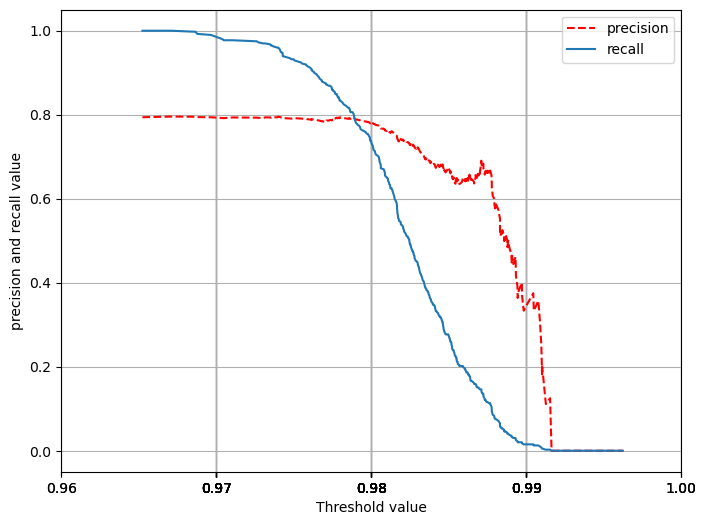

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def precision_recall_curve_plot(y_test,pred):
    precisions, recalls,thresholds = precision_recall_curve(y_test,pred)
    
    plt.figure(figsize=(8,6))
    threshold_index = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_index],'r--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_index],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.around(np.arange(start,end,0.001),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,pred)

In [44]:
precisions, recalls,thresholds = precision_recall_curve(y_test,pred)

for i in range(len(precisions)):
    if recalls[i]<=precisions[i]:
        thresholds_fit=thresholds[i]
        break
    
print(i)

0.9789123


In [45]:
y_pred=pred.reshape(-1)
y_pred

array([0.98775977, 0.9850607 , 0.98211235, 0.97499   , 0.973997  ,
       0.98549974, 0.98149765, 0.9868713 , 0.9788783 , 0.9776456 ,
       0.984624  , 0.98638624, 0.98148835, 0.9727142 , 0.983624  ,
       0.98323977, 0.9779882 , 0.9842289 , 0.9858461 , 0.98205125,
       0.9885471 , 0.979303  , 0.98339057, 0.98331904, 0.9789367 ,
       0.9816553 , 0.97039574, 0.98079985, 0.9811458 , 0.98060197,
       0.9824405 , 0.98833984, 0.9798614 , 0.98157746, 0.98812306,
       0.9812267 , 0.979906  , 0.98502046, 0.9909643 , 0.98136526,
       0.9817191 , 0.98146164, 0.985923  , 0.98147887, 0.9783655 ,
       0.9819795 , 0.977115  , 0.9779104 , 0.9816829 , 0.98368055,
       0.987495  , 0.9855479 , 0.9777703 , 0.98419994, 0.9801105 ,
       0.98410994, 0.9816292 , 0.98099554, 0.98452234, 0.9790668 ,
       0.97316813, 0.97707975, 0.98758   , 0.9696484 , 0.98048645,
       0.9813114 , 0.98508435, 0.98160297, 0.9778364 , 0.9882448 ,
       0.9761253 , 0.98856044, 0.9789123 , 0.9841825 , 0.99497

In [46]:
y_pred=pred.reshape(-1)
threshold = thresholds
pred = (y_pred >= threshold)

In [47]:
pred

array([ True,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [48]:
import numpy as np

y_test=np.array(y_test['predict'])


In [49]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
from sklearn.metrics import accuracy_score

accuracy_test= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test}')

Accuracy: 0.668
